<a href="https://colab.research.google.com/github/katiavas/sql/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
notebook_dir = "/content/drive/MyDrive/Colab Notebooks/"

In [ ]:
from google.colab import drive
import requests
drive.mount('/content/drive')
import os
os.chdir(notebook_dir)

Mounted at /content/drive


In [ ]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install torch_geometric==2.0.1


# Optional dependencies:
# !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 112.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the

In [ ]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 40.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
from torch import nn
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [ ]:
def load_array(filename, task):
    datapoint = np.load(filename)
    if task == 'task 1':
        initial_state = datapoint['initial_state']
        terminal_state = datapoint['terminal_state']
        return initial_state, terminal_state
    elif task == 'task 2' or task == 'task 3':
        whole_trajectory = datapoint['trajectory']
        # change shape: (num_bodies, attributes, time) ->  num_bodies, time, attributes
        whole_trajectory = np.swapaxes(whole_trajectory, 1, 2)
        initial_state = whole_trajectory[:, 0]
        target = whole_trajectory[:, 1:, 1:]  # drop the first timepoint (second dim) and mass (last dim) for the prediction task
        return initial_state, target
    else:
        raise NotImplementedError("'task' argument should be 'task 1', 'task 2' or 'task 3'!")

In [ ]:
# directory_path = 'data/task 1/train/'  # Path to the directory containing .npz files
"""
This cell gives an example of loading a datapoint with numpy for task 1.

The arrays returned by the function are structures as follows:
initial_state: shape (n_bodies, [mass, x, y, v_x, v_y])
terminal_state: shape (n_bodies, [x, y])

"""
directory_path = '/content/drive/MyDrive/data/task 1/train/'

initial_state_train = []  # List to store the data
remaining_trajectory_train = []  # List to store the data

for file_name in os.listdir(directory_path):
    if file_name.endswith('.npz'):
        file_path = os.path.join(directory_path, file_name)

        # Load the .npz file
        loaded_data = load_array(file_path, task='task 1')

        initial_state, remaining_trajectory = loaded_data


        # Append the data to the list

        initial_state_train.append(initial_state)
        remaining_trajectory_train.append(remaining_trajectory)


initial_state_train = np.array(initial_state_train)
remaining_trajectory_train = np.array(remaining_trajectory_train)
remaining_trajectory_train.shape

<ipython-input-52-60d65b43fd47>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  initial_state_train = np.array(initial_state_train)
<ipython-input-52-60d65b43fd47>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  remaining_trajectory_train = np.array(remaining_trajectory_train)


(2,)

In [ ]:
# directory_path = 'data/task 1/test/'  # Path to the directory containing .npz files
# Get all the trajectories into one list
directory_path = '/content/drive/MyDrive/data/task 1/test/'


initial_state_test = []  # List to store the data
remaining_trajectory_test = []  # List to store the data

for file_name in os.listdir(directory_path):
    if file_name.endswith('.npz'):
        file_path = os.path.join(directory_path, file_name)

        # Load the .npz file
        loaded_data = load_array(file_path, task='task 1')

        initial_state, remaining_trajectory = loaded_data

        initial_state_test.append(initial_state)
        remaining_trajectory_test.append(remaining_trajectory)


initial_state_test = np.array(initial_state_test)
remaining_trajectory_test = np.array(remaining_trajectory_test)


<ipython-input-53-8e11258f9d44>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  initial_state_test = np.array(initial_state_test)
<ipython-input-53-8e11258f9d44>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  remaining_trajectory_test = np.array(remaining_trajectory_test)


IndexError: ignored

In [ ]:
"""
This cell gives an example of loading a datapoint with numpy for task 2 / 3.

The arrays returned by the function are structures as follows:
initial_state: shape (n_bodies, [mass, x, y, v_x, v_y])
remaining_trajectory: shape (n_bodies, time, [x, y, v_x, v_y])

Note that for this task, you are asked to evaluate performance only with regard to the predictions of the positions (x and y).
If you use the velocity of the remaining trajectory for training,
this use should be purely auxiliary for the goal of predicting the positions [x,y] over time.
While testing performance of your model on the test set, you do not have access to v_x and v_y of the remaining trajectory.

"""
directory_path = '/content/drive/MyDrive/data/task 2_3/train/'

initial_state_train = []  # List to store the data
remaining_trajectory_train = []  # List to store the data

for file_name in os.listdir(directory_path):
    if file_name.endswith('.npz'):
        file_path = os.path.join(directory_path, file_name)

        # Load the .npz file
        loaded_data = load_array(file_path, task='task 2')

        initial_state, remaining_trajectory = loaded_data


        # Append the data to the list

        initial_state_train.append(initial_state)
        remaining_trajectory_train.append(remaining_trajectory)


initial_state_train = np.array(initial_state_train)
remaining_trajectory_train = np.array(remaining_trajectory_train)
remaining_trajectory_train[0].shape
for trajectory in remaining_trajectory_train:
    time_feature = trajectory[:, :, 0]
    time_feature_shape = time_feature.shape
    time_feature_shape
    # Do something with the time feature


<ipython-input-67-3260515f1737>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  initial_state_train = np.array(initial_state_train)
<ipython-input-67-3260515f1737>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  remaining_trajectory_train = np.array(remaining_trajectory_train)


In [ ]:
for trajectory in remaining_trajectory_train:
    time_feature = trajectory[1, :,1]
    print(time_feature)

Streaming output truncated to the last 5000 lines.
[4.78798396 4.76411175 4.74017636 4.71619482 4.6921843  4.66816222
 4.64414637 4.62015502 4.59620699 4.57232174 4.54851945 4.52482107
 4.50124848 4.47782453 4.45457322 4.43151977 4.4086908  4.3861145
 4.36382079 4.34184155 4.32021086 4.29896527 4.27814413 4.25778996
 4.23794888 4.21867112 4.20001163 4.18203076 4.16479512 4.14837839
 4.13286257 4.11833965 4.10491352 4.0927023  4.08184121 4.07248604
 4.06481816 4.05905079 4.05543709 4.05428078 4.05595053 4.06089967
 4.06969382 4.08304884 4.10188334 4.12738871 4.16111067 4.20499801
 4.261232  ]
[5.50556556 5.40871149 5.31124817 5.21319159 5.1145575  5.01536144
 4.91561913 4.81534679 4.71456181 4.61328218 4.51152578 4.4093094
 4.30665054 4.20356797 4.10008103 3.996209   3.89197108 3.7873875
 3.68247916 3.57726689 3.47177184 3.36601592 3.26002217 3.15381513
 3.04742032 2.94086424 2.83417298 2.72737053 2.62048118 2.51352888
 2.4065385  2.29953495 2.1925436  2.08559041 1.97870282 1.87190884
 

In [ ]:
# add relative locations as a feature because the gravitational dynamics depend only in relative location
'''import torch
from torch_geometric.data import Data

def calculate_distance(x1, y1, x2, y2):
    return torch.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def get_data_object(x, y):
    data_list = []
    for i in range(len(x)):
        x_tensor = torch.tensor(x[i])
        y_tensor = torch.tensor(y[i])

        num_nodes = x_tensor.shape[0]
        positions = x_tensor[:, 1:3]  # Extract positions (x, y) from initial state tensor

        relative_locations = torch.zeros(num_nodes, dtype=torch.float)  # Initialize tensor for relative locations

        for j in range(num_nodes):
            distances = []
            for k in range(num_nodes):
                if j != k:
                    x1, y1 = positions[j]
                    x2, y2 = positions[k]
                    distance = calculate_distance(x1, y1, x2, y2)
                    distances.append(distance)
            distances = torch.stack(distances)
            relative_locations[j] = torch.mean(distances)


        edge_index_tensor = torch.tensor([
            [j for j in range(num_nodes)],
            [j for j in range(num_nodes)]
        ], dtype=torch.long)

        edge_attr_tensor = torch.tensor(relative_locations, dtype=torch.float)  # Use relative_locations as edge attribute

        data = Data(x=x_tensor, edge_index=edge_index_tensor, edge_attr=edge_attr_tensor, y=y_tensor)
        data_list.append(data)
    return data_list

data_list = get_data_object(initial_state_train, remaining_trajectory_train)

data_list = get_data_object(initial_state_train, remaining_trajectory_train)

data_list

<ipython-input-12-ae4060bd0b28>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr_tensor = torch.tensor(relative_locations, dtype=torch.float)  # Use relative_locations as edge attribute


[Data(x=[9, 5], edge_index=[2, 9], edge_attr=[9], y=[9, 2]),
 Data(x=[5, 5], edge_index=[2, 5], edge_attr=[5], y=[5, 2]),
 Data(x=[7, 5], edge_index=[2, 7], edge_attr=[7], y=[7, 2]),
 Data(x=[6, 5], edge_index=[2, 6], edge_attr=[6], y=[6, 2]),
 Data(x=[7, 5], edge_index=[2, 7], edge_attr=[7], y=[7, 2]),
 Data(x=[8, 5], edge_index=[2, 8], edge_attr=[8], y=[8, 2]),
 Data(x=[5, 5], edge_index=[2, 5], edge_attr=[5], y=[5, 2]),
 Data(x=[5, 5], edge_index=[2, 5], edge_attr=[5], y=[5, 2]),
 Data(x=[5, 5], edge_index=[2, 5], edge_attr=[5], y=[5, 2]),
 Data(x=[9, 5], edge_index=[2, 9], edge_attr=[9], y=[9, 2]),
 Data(x=[5, 5], edge_index=[2, 5], edge_attr=[5], y=[5, 2]),
 Data(x=[4, 5], edge_index=[2, 4], edge_attr=[4], y=[4, 2]),
 Data(x=[5, 5], edge_index=[2, 5], edge_attr=[5], y=[5, 2]),
 Data(x=[8, 5], edge_index=[2, 8], edge_attr=[8], y=[8, 2]),
 Data(x=[9, 5], edge_index=[2, 9], edge_attr=[9], y=[9, 2]),
 Data(x=[8, 5], edge_index=[2, 8], edge_attr=[8], y=[8, 2]),
 Data(x=[8, 5], edge_ind

In [ ]:
import torch
from torch_geometric.data import Data

def calculate_distance(x1, y1, x2, y2):
    return torch.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def get_data_object(x, y):
    data_list = []
    for i in range(len(x)):
        x_tensor = torch.tensor(x[i])
        y_tensor = torch.tensor(y[i])

        num_nodes = x_tensor.shape[0]
        positions = x_tensor[:, 1:3]  # Extract positions (x, y) from initial state tensor

        relative_locations = torch.zeros(num_nodes, dtype=torch.float)  # Initialize tensor for relative locations

        for j in range(num_nodes):
            distances = []
            for k in range(num_nodes):
                if j != k:
                    x1, y1 = positions[j]
                    x2, y2 = positions[k]
                    distance = calculate_distance(x1, y1, x2, y2)
                    distances.append(distance)
            distances = torch.stack(distances)
            relative_locations[j] = torch.mean(distances)

        x_tensor = torch.cat([x_tensor, relative_locations.view(-1, 1)], dim=1)  # Add relative location feature

        edge_index_tensor = torch.tensor([
            [j for j in range(num_nodes)],
            [j for j in range(num_nodes)]
        ], dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index_tensor, y=y_tensor)
        data_list.append(data)
    return data_list

data_list = get_data_object(initial_state_train, remaining_trajectory_train)
data_list

[Data(x=[9, 6], edge_index=[2, 9], y=[9, 2]),
 Data(x=[5, 6], edge_index=[2, 5], y=[5, 2]),
 Data(x=[7, 6], edge_index=[2, 7], y=[7, 2]),
 Data(x=[6, 6], edge_index=[2, 6], y=[6, 2]),
 Data(x=[7, 6], edge_index=[2, 7], y=[7, 2]),
 Data(x=[8, 6], edge_index=[2, 8], y=[8, 2]),
 Data(x=[5, 6], edge_index=[2, 5], y=[5, 2]),
 Data(x=[5, 6], edge_index=[2, 5], y=[5, 2]),
 Data(x=[5, 6], edge_index=[2, 5], y=[5, 2]),
 Data(x=[9, 6], edge_index=[2, 9], y=[9, 2]),
 Data(x=[5, 6], edge_index=[2, 5], y=[5, 2]),
 Data(x=[4, 6], edge_index=[2, 4], y=[4, 2]),
 Data(x=[5, 6], edge_index=[2, 5], y=[5, 2]),
 Data(x=[8, 6], edge_index=[2, 8], y=[8, 2]),
 Data(x=[9, 6], edge_index=[2, 9], y=[9, 2]),
 Data(x=[8, 6], edge_index=[2, 8], y=[8, 2]),
 Data(x=[8, 6], edge_index=[2, 8], y=[8, 2]),
 Data(x=[7, 6], edge_index=[2, 7], y=[7, 2]),
 Data(x=[7, 6], edge_index=[2, 7], y=[7, 2]),
 Data(x=[8, 6], edge_index=[2, 8], y=[8, 2]),
 Data(x=[6, 6], edge_index=[2, 6], y=[6, 2]),
 Data(x=[4, 6], edge_index=[2, 4],

In [ ]:
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader


train_data, val_data = train_test_split(data_list, test_size=0.2, random_state=42)
train_loader = DataLoader(train_data, batch_size=30)
val_loader = DataLoader(val_data, batch_size=30)
##train_loader = DataLoader(data_list, batch_size=30)
#train_loader

In [ ]:
test_data = get_data_object(initial_state_test, remaining_trajectory_test)

test_loader = DataLoader(test_data, batch_size=30)
test_loader

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
# Baselines
import torch
from torch_geometric.data import DataLoader
from sklearn.metrics import mean_squared_error


# Define your linear baseline model
def LinearBaseline(x):
      positions_x = x[:, 1] + x[:, 3] * 5
      positions_y = x[:, 2] + x[:, 4] * 5.0
      stacked_positions = torch.stack((positions_x, positions_y), dim=1)

      return stacked_positions

# Define your linear baseline model
def ConstantBaseline(x):
      positions_x = x[:, 1]
      positions_y = x[:, 2]
      stacked_positions = torch.stack((positions_x, positions_y), dim=1)

      return stacked_positions
# Create a data loader from the data_list
#data_loader = DataLoader(data_list, batch_size=1, shuffle=True)

# Create an optimizer
def evaluate_linear_baseline(data_loader):
    total_loss = 0

    for data in data_loader:
        x = data.x  # Input features
        y = data.y  # Target labels
        # print(y, 'Y TRUE')
        out = LinearBaseline(x)
        loss = mean_squared_error(out, y)
        total_loss += loss
        # print(loss)
    avg_loss = total_loss / len(data_loader)
    print(avg_loss)

def evaluate_constant_baseline(data_loader):
    total_loss = 0

    for data in data_loader:
        x = data.x  # Input features
        y = data.y  # Target labels
        # print(y, 'Y TRUE')
        out = ConstantBaseline(x)
        loss = mean_squared_error(out, y)
        total_loss += loss
        # print(loss)
    avg_loss = total_loss / len(data_loader)
    print(avg_loss,'Constant Baseline on Train Data')



baseline_constant_train = evaluate_constant_baseline(train_loader)
baseline_constant_val = evaluate_constant_baseline(val_loader)
baseline_constant_test = evaluate_constant_baseline(test_loader)


baseline_on_train_data = evaluate_linear_baseline(train_loader)
baseline_on_validation_data = evaluate_linear_baseline(val_loader)
baseline_on_test_data = evaluate_linear_baseline(test_loader)


# Evaluation
# avg_loss = evaluate(model, data_loader)


14.076583133353578 Constant Baseline on Train Data
13.281135515064955 Constant Baseline on Train Data
11.544181071746573 Constant Baseline on Train Data
22.366187333384815
21.168016585892353
22.457220100054865
22.457220100054865


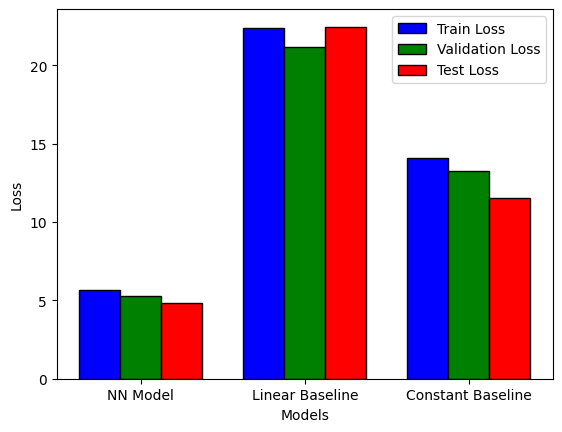

In [ ]:
import matplotlib.pyplot as plt

# Define the model names and corresponding losses
model_names = ['NN Model', 'Linear Baseline', 'Constant Baseline']
train_losses = [5.6339, 22.366187333384815, 14.076583133353578]
val_losses = [5.3033, 21.168016585892353, 13.281135515064955]
test_losses = [4.7995, 22.457220100054865, 11.544181071746573]

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.bar(r1, train_losses, color='b', width=bar_width, edgecolor='black', label='Train Loss')
plt.bar(r2, val_losses, color='g', width=bar_width, edgecolor='black', label='Validation Loss')
plt.bar(r3, test_losses, color='r', width=bar_width, edgecolor='black', label='Test Loss')

# Add x-axis labels and tick labels
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)

# Add a legend
plt.legend()

# Display the bar chart
plt.show()


In [ ]:
# prediction of terminal positions for 49 timestamps based on initial data using a graph neural network
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
from torch_geometric.nn import SAGEConv
from torch_geometric.nn import GATConv
import matplotlib.pyplot as plt


device = 'cuda:0'
class GNNPredictor(MessagePassing):
    def __init__(self, in_channels, hidden_channels):
        super(GNNPredictor, self).__init__(aggr='mean')  # Use "mean" aggregation for message passing
        self.lin1 = nn.Linear(in_channels, hidden_channels)
        self.lin2 = nn.Linear(hidden_channels, hidden_channels)
        self.lin3 = nn.Linear(hidden_channels, 2)  # Output 2-dimensional terminal positions

    def forward(self, x, edge_index):
      x = self.lin1(x)
      x = F.relu(x)
      x = self.lin2(x)
      x = self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)
      x = self.lin3(x)
      return x


    def message(self, x_j, edge_index, size):
        row, col = edge_index
        deg = degree(col, size[0], dtype=x_j.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]
        return x_j * norm.view(-1, 1)


num_features = 6
hidden_channels=64
#model_gnn = GraphSAGE(num_features, hidden_channels) # initialize our GNN with a hidden size of 16#
#model_gnn = model_gnn.double()


# same loss and optimizer as before
# optimizer = torch.optim.Adam(model_gnn.parameters(), lr=0.01, weight_decay=5e-4)
# Create an instance of the GNNPredictor model
model = GNNPredictor(in_channels=6, hidden_channels=64)
model = model.double()

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
total_epoch_loss = 0
num_epochs=100
# Training loop
model.train()  # Set the model in training mode
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        batch = batch # Move the batch to the device (e.g., GPU)

        optimizer.zero_grad()  # Clear gradients

        # Forward pass
        x = batch.x
        # x = x.float()
        # print(x)
        edge_index = batch.edge_index
        # print(edge_index)
        y_true = batch.y
        y_pred = model(x, edge_index)

        # Compute loss
        loss = loss_fn(y_pred, y_true)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()



    avg_loss = total_loss / len(train_loader)
    total_epoch_loss += avg_loss / num_epochs
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_loss:.4f}")
    # Validation phase
    model.eval()  # Set the model in evaluation mode
    with torch.no_grad():
        total_val_loss = 0
        for batch in val_loader:
            batch = batch  # Move the batch to the device (e.g., GPU)

            x = batch.x
            edge_index = batch.edge_index
            y_true = batch.y
            y_pred = model(x, edge_index)

            val_loss = loss_fn(y_pred, y_true)
            total_val_loss += val_loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}")
print('Average loss, over epochs', total_epoch_loss)




Epoch 1/100, Training Loss: 10.2523
Epoch 1/100, Validation Loss: 6.9555
Epoch 2/100, Training Loss: 7.4685
Epoch 2/100, Validation Loss: 6.4371
Epoch 3/100, Training Loss: 7.2034
Epoch 3/100, Validation Loss: 6.2925
Epoch 4/100, Training Loss: 7.0094
Epoch 4/100, Validation Loss: 6.2373
Epoch 5/100, Training Loss: 6.8867
Epoch 5/100, Validation Loss: 6.2434
Epoch 6/100, Training Loss: 6.7692
Epoch 6/100, Validation Loss: 6.1666
Epoch 7/100, Training Loss: 6.6733
Epoch 7/100, Validation Loss: 6.0104
Epoch 8/100, Training Loss: 6.5114
Epoch 8/100, Validation Loss: 5.8515
Epoch 9/100, Training Loss: 6.3872
Epoch 9/100, Validation Loss: 5.8940
Epoch 10/100, Training Loss: 6.3137
Epoch 10/100, Validation Loss: 5.8604
Epoch 11/100, Training Loss: 6.2753
Epoch 11/100, Validation Loss: 5.9269
Epoch 12/100, Training Loss: 6.2289
Epoch 12/100, Validation Loss: 5.8967
Epoch 13/100, Training Loss: 6.1814
Epoch 13/100, Validation Loss: 5.8846
Epoch 14/100, Training Loss: 6.1438
Epoch 14/100, Valid

Mean Difference: 1.3772622218933668
Standard Deviation Difference: 0.9385655901626421
Minimum Difference: 0.034908957514182326
Maximum Difference: 3.628986275556466
95th Percentile Difference: 3.1991105393500043


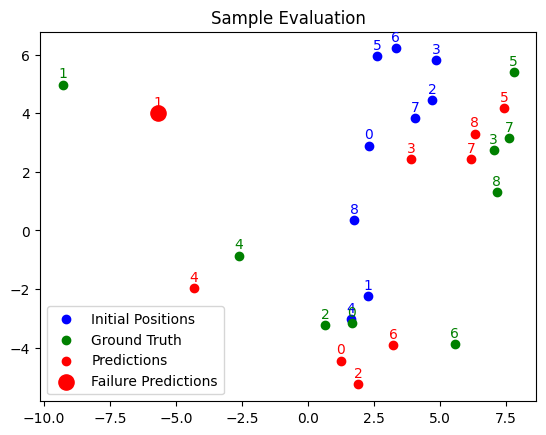

Mean Difference: 1.3028639050768334
Standard Deviation Difference: 1.5976837802771473
Minimum Difference: 0.1942724926103354
Maximum Difference: 4.883755872302281
95th Percentile Difference: 4.460857558191358


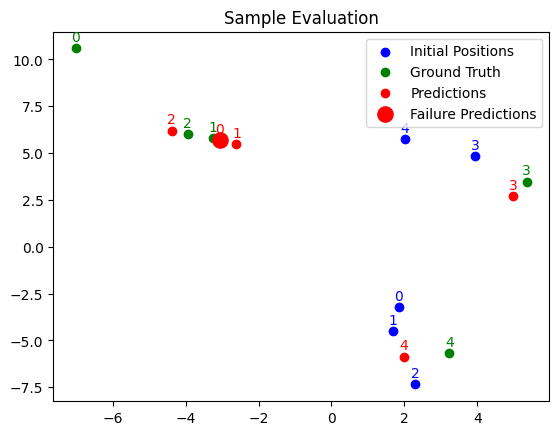

Mean Difference: 1.9706470665500018
Standard Deviation Difference: 1.067119785809331
Minimum Difference: 0.5158341871117815
Maximum Difference: 3.923094354346663
95th Percentile Difference: 3.8260716701028916


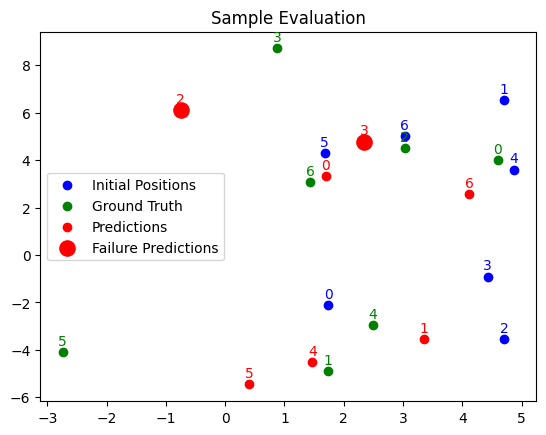

Mean Difference: 0.908806055542449
Standard Deviation Difference: 0.6967663404135024
Minimum Difference: 0.08427747150119602
Maximum Difference: 2.626881543561682
95th Percentile Difference: 2.086366599308022


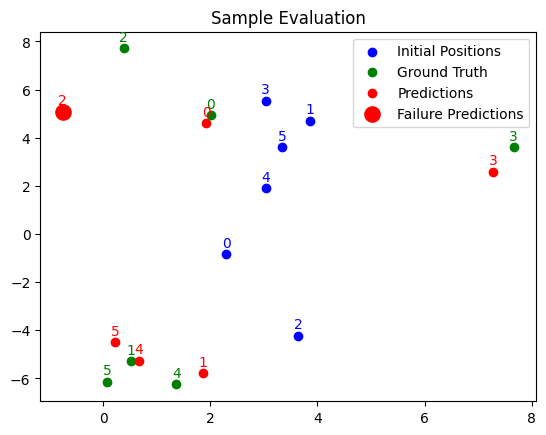

Mean Difference: 1.8357220455144279
Standard Deviation Difference: 1.481634679119702
Minimum Difference: 0.22289473549376648
Maximum Difference: 6.057461590385688
95th Percentile Difference: 4.166101767341433


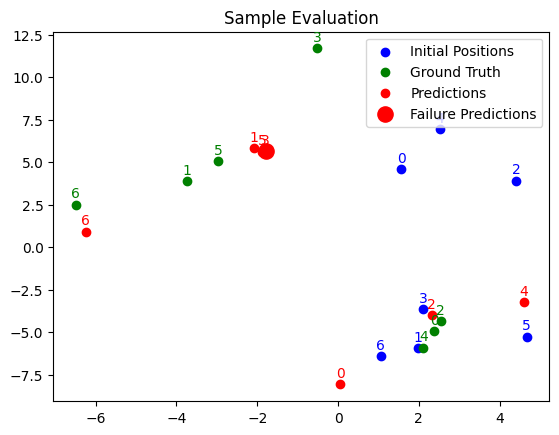

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select samples for evaluation (e.g., randomly select 5 samples)
evaluation_samples = data_list[:5]

# Set the model to evaluation mode
model.eval()

# Set the threshold for failure prediction
threshold = 11.54  # Adjust this value according to your needs

# Evaluate the selected samples
for sample in evaluation_samples:
    x = sample.x
    edge_index = sample.edge_index
    y_true = sample.y

    with torch.no_grad():
        y_pred = model(x, edge_index)


    # Convert tensors to numpy arrays for visualization
    x_values = x.squeeze().numpy()
    y_true_values = y_true.squeeze().numpy()
    y_pred_values = y_pred.squeeze().numpy()

    # Compute the differences between y_pred and y_true
    differences = np.abs(y_pred_values - y_true_values)

    # Calculate the summary statistics
    mean_difference = np.mean(differences)
    std_difference = np.std(differences)
    min_difference = np.min(differences)
    max_difference = np.max(differences)
    percentile_95 = np.percentile(differences, 95)

    # Print the summary statistics
    print("Mean Difference:", mean_difference)
    print("Standard Deviation Difference:", std_difference)
    print("Minimum Difference:", min_difference)
    print("Maximum Difference:", max_difference)
    print("95th Percentile Difference:", percentile_95)
    threshold = np.percentile(differences, 95)


    # Compute the Euclidean distance between predicted and ground truth positions
    distances = np.linalg.norm(y_pred_values - y_true_values, axis=1)


    # Find the indices where the distances are above the threshold (failure cases)
    failure_indices = np.where(distances > threshold)[0]

    # Plot the failure cases
    plt.figure()
    plt.scatter(x_values[:, 0], x_values[:, 1], color='b', label='Initial Positions')
    plt.scatter(y_true_values[:, 0], y_true_values[:, 1], color='g', label='Ground Truth')
    plt.scatter(y_pred_values[:, 0], y_pred_values[:, 1], color='r', label='Predictions')

    # Add labels for each point
    for i, (x, y) in enumerate(zip(x_values[:, 0], x_values[:, 1])):
        plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='b')
    for i, (x, y) in enumerate(zip(y_true_values[:, 0], y_true_values[:, 1])):
        plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='g')
    for i, (x, y) in enumerate(zip(y_pred_values[:, 0], y_pred_values[:, 1])):
        plt.annotate(f'{i}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', color='r')

    # Highlight failure cases with a larger marker size
    plt.scatter(y_pred_values[failure_indices, 0], y_pred_values[failure_indices, 1], color='r',
                label='Failure Predictions', s=120)

    plt.legend()
    plt.title('Sample Evaluation')
    plt.show()


In [ ]:
test_data = get_data_object(initial_state_test, remaining_trajectory_test)

test_loader = DataLoader(test_data, batch_size=30)
test_loader

In [ ]:
model.eval()  # Set the model in evaluation mode
total_loss = 0

with torch.no_grad():
    for data in test_loader:
        x = data.x
        edge_index = data.edge_index
        y_true = data.y
        y_pred = model(x, edge_index)

        loss = loss_fn(y_pred, y_true)
        total_loss += loss.item()

avg_loss = total_loss / len(test_loader)
print(f"Average Loss on Test Data: {avg_loss:.4f}")


Average Loss on Test Data: 4.7995
